# clustering EastWestAirlines data


Q2] Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [35]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [36]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [37]:
data.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [38]:
data.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [39]:
data1=data.copy()

In [40]:
data1.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [41]:
data_norm=preprocessing.scale(data1)

In [42]:
#standardizing the data to normal distribution
data_norm=pd.DataFrame(data_norm)

In [43]:
data_norm.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919


[]

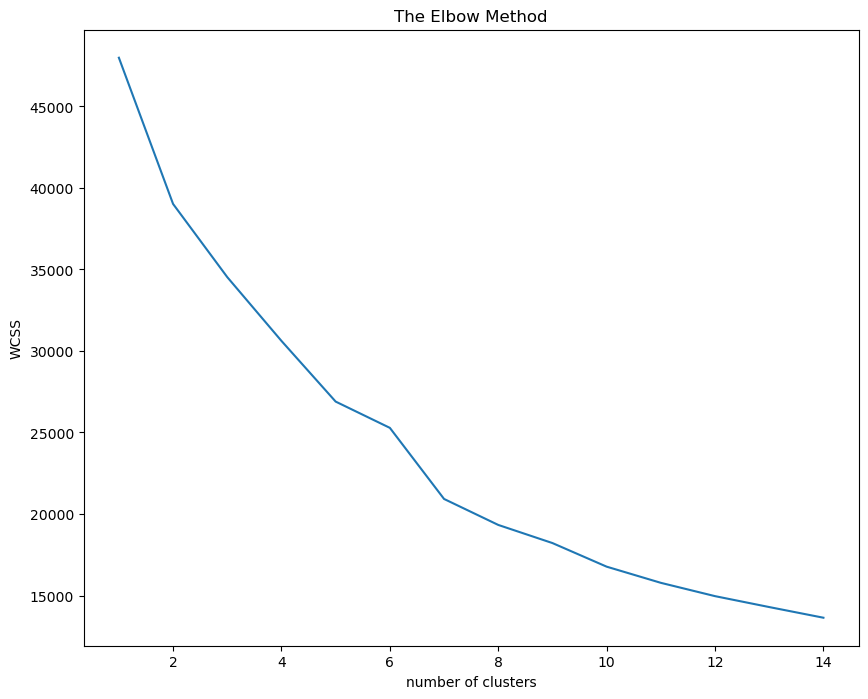

In [44]:
#finding the optimal number of clusters
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.plot()


In [45]:
#as you see in graph the slope changes at point 2.however splitting 
#the data set into 2 group would not be very benificial we further 
#evaluate cluster for higher value of k.

In [46]:
#euclidean distance

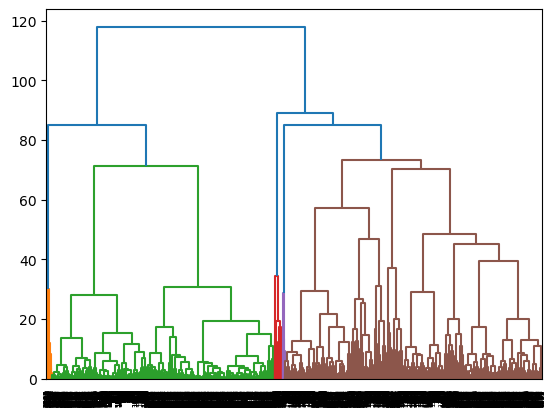

In [47]:
data_dendogram=sch.dendrogram(sch.linkage(data_norm,method='ward'))


In [48]:
x=data_norm.values

In [49]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')


In [50]:
h_cluster=model.fit(x)

In [51]:
labels=model.labels_

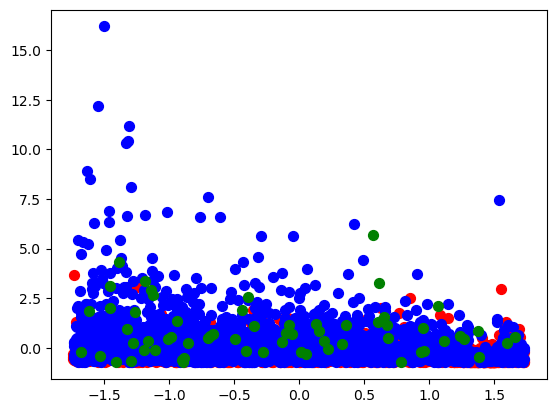

In [52]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='o', color='green')


In [53]:
kmean=KMeans(n_clusters= 3,init='k-means++',random_state = 22)
k_means=kmeans.fit_predict(data_norm)

In [54]:
k_means

array([6, 6, 6, ..., 0, 1, 1])

In [55]:
k_means1=k_means+1
k_cluster=list(k_means1)

In [56]:
data1['k_cluster']=k_cluster

In [57]:
kmeans_mean_cluster=pd.DataFrame(round(data1.groupby('k_cluster').mean(),1))

In [58]:
kmeans_mean_cluster.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2933.9,48820.7,81.5,1.9,1.0,1.0,12633.5,11.1,286.0,0.9,2567.0,1.0
2,3217.5,29057.1,36.8,1.0,1.0,1.0,2252.5,4.6,108.9,0.4,1975.3,0.0
3,994.9,125441.5,21.6,3.5,1.0,1.0,29793.5,16.5,175.8,0.5,5916.2,0.0


In [59]:
pd.DataFrame(round(data1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,407,407,407,407,407,407,407,407,407,407,407,407
2,896,896,896,896,896,896,896,896,896,896,896,896
3,335,335,335,335,335,335,335,335,335,335,335,335
4,28,28,28,28,28,28,28,28,28,28,28,28
5,142,142,142,142,142,142,142,142,142,142,142,142
6,15,15,15,15,15,15,15,15,15,15,15,15
7,779,779,779,779,779,779,779,779,779,779,779,779
8,376,376,376,376,376,376,376,376,376,376,376,376
9,53,53,53,53,53,53,53,53,53,53,53,53


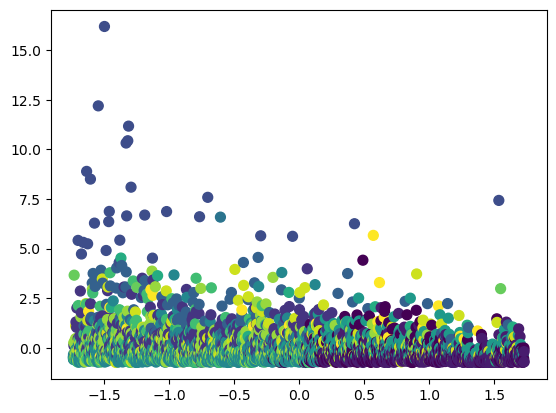

In [60]:
plt.scatter(x[:,0],x[:,1],c=k_means,s=50,cmap='viridis')

In [ ]:
#From the above data generated from K-Means clustering,
#we can see Cluster-1 has around 63% total travelers and cluster
#2 has 33% of the travelers. We will target cluster 1 & 2. Cluster
#1 contains less frequent or first time travellers, by giving them 
#discount provided they travel more than twice or thrice and 
#introduce more offer if they register or take the membership.

